# Microsoft is getting into the movie business and they need some recommendations to maximize ROI. Using data from IMBD, The Numbers, and Box Office Mojo come up with 3 business questions and report back with your findings. 

The 3 questions are related to the content of the movies, the most successful studios, and the highest grossing writers /directors

Specifically:

> 1.) What is the state of the current movie business.

> 2.) What is the most lucrative movie genre? 

> 3.) Interms of total income generated which studio is the best at making the most lucative genre?

> 4.) Which writer/director combination will yeild the highest return? 

In [79]:
#Import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os as os
from glob import glob
from scipy import stats

# Import data and Create dataframes

Use glob method here to import all files. Then create a function to reformat the filenames and convert into dataframes. 

In [80]:
#create variable for csv files
csv_files = glob("zippedData/*.csv.gz")

In [81]:
#create function to create a dictionary of csv_files and format their names, and create df from them
csv_files_dict = {} #create null dictionary
for filename in csv_files: #for every element in the csv_files list
    filename_cleaned = os.path.basename(filename).replace("csv","").replace(".","_") #format the filename
    filename_df = pd.read_csv(filename,index_col = 0) #create a dataframe from the dataframe
    csv_files_dict[filename_cleaned] = filename_df #assign dataframe to variable based on cleaned name

In [82]:
#rename budget dataframe
tn_movie_budgets__gz = csv_files_dict['tn_movie_budgets__gz']

#verify df
tn_movie_budgets__gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [83]:
#rename studio dataframe
bom_movie_gross__gz = csv_files_dict['bom_movie_gross__gz']

#verify df
bom_movie_gross__gz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


# Merge budget and studio

Create a large table by joining 4 tables together. This method will allow a corrolation analysis between the numerical variables.

In [84]:
#merge budget and studio dataframes
tn_movie_budgets__gz = tn_movie_budgets__gz.merge(bom_movie_gross__gz,how='left',left_on='movie',right_on='title')

#verify df
tn_movie_budgets__gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   object 
 3   domestic_gross_x   5782 non-null   object 
 4   worldwide_gross    5782 non-null   object 
 5   studio             1246 non-null   object 
 6   domestic_gross_y   1245 non-null   float64
 7   foreign_gross      1086 non-null   object 
 8   year               1247 non-null   float64
dtypes: float64(2), object(7)
memory usage: 451.7+ KB


# Merge budget and tconst/Genre/Runtime

In [85]:
#rename genre
imdb_title_basics__gz = csv_files_dict['imdb_title_basics__gz']

#check types
imdb_title_basics__gz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [86]:
#make the origional index (tconst) into a column by resetting index #only run once!
imdb_title_basics__gz.reset_index(inplace=True)

#verify result
imdb_title_basics__gz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [87]:
#merge genre to budgets
tn_movie_budgets__gz = tn_movie_budgets__gz.merge(imdb_title_basics__gz,how='left'
                                                  ,left_on='movie',right_on='original_title')
tn_movie_budgets__gz.head()
tn_movie_budgets__gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6989 entries, 0 to 6988
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       6989 non-null   object 
 1   movie              6989 non-null   object 
 2   production_budget  6989 non-null   object 
 3   domestic_gross_x   6989 non-null   object 
 4   worldwide_gross    6989 non-null   object 
 5   studio             1621 non-null   object 
 6   domestic_gross_y   1620 non-null   float64
 7   foreign_gross      1398 non-null   object 
 8   year               1622 non-null   float64
 9   tconst             3537 non-null   object 
 10  primary_title      3537 non-null   object 
 11  original_title     3537 non-null   object 
 12  start_year         3537 non-null   float64
 13  runtime_minutes    3070 non-null   float64
 14  genres             3473 non-null   object 
dtypes: float64(4), object(11)
memory usage: 873.6+ KB


# Merge crew with budget

In [88]:
#rename crew
imdb_title_crew__gz = csv_files_dict['imdb_title_crew__gz']

#verify datatypes
imdb_title_crew__gz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   directors  140417 non-null  object
 1   writers    110261 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


In [89]:
#make the origional index (tconst) into a column by resetting index #only run once!
imdb_title_crew__gz.reset_index(inplace=True)

#verify result
imdb_title_crew__gz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [90]:
#merge crew to budget
tn_movie_budgets__gz = tn_movie_budgets__gz.merge(imdb_title_crew__gz,how='left',left_on='tconst',right_on='tconst')

#verify
tn_movie_budgets__gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6989 entries, 0 to 6988
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       6989 non-null   object 
 1   movie              6989 non-null   object 
 2   production_budget  6989 non-null   object 
 3   domestic_gross_x   6989 non-null   object 
 4   worldwide_gross    6989 non-null   object 
 5   studio             1621 non-null   object 
 6   domestic_gross_y   1620 non-null   float64
 7   foreign_gross      1398 non-null   object 
 8   year               1622 non-null   float64
 9   tconst             3537 non-null   object 
 10  primary_title      3537 non-null   object 
 11  original_title     3537 non-null   object 
 12  start_year         3537 non-null   float64
 13  runtime_minutes    3070 non-null   float64
 14  genres             3473 non-null   object 
 15  directors          3452 non-null   object 
 16  writers            3109 

# Merge popularity with budget

In [91]:
#rename popularity
imdb_title_crew__gz = csv_files_dict['tmdb_movies__gz']

#verify datatypes
imdb_title_crew__gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [92]:
#merge popularity to budget
tn_movie_budgets__gz = tn_movie_budgets__gz.merge(imdb_title_crew__gz,how='left',left_on='movie',right_on='original_title')

#verify
tn_movie_budgets__gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8148 entries, 0 to 8147
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date_x     8148 non-null   object 
 1   movie              8148 non-null   object 
 2   production_budget  8148 non-null   object 
 3   domestic_gross_x   8148 non-null   object 
 4   worldwide_gross    8148 non-null   object 
 5   studio             2057 non-null   object 
 6   domestic_gross_y   2056 non-null   float64
 7   foreign_gross      1734 non-null   object 
 8   year               2058 non-null   float64
 9   tconst             4686 non-null   object 
 10  primary_title      4686 non-null   object 
 11  original_title_x   4686 non-null   object 
 12  start_year         4686 non-null   float64
 13  runtime_minutes    4070 non-null   float64
 14  genres             4603 non-null   object 
 15  directors          4570 non-null   object 
 16  writers            4078 

# Remove unnessesary columns

In [93]:
#Drop unnessesary columns
tn_movie_budgets__gz = tn_movie_budgets__gz.drop(columns=['domestic_gross_y', 'foreign_gross','year','primary_title'
                                                          ,'original_title_x','start_year','genre_ids','id'
                                                          ,'original_language','original_title_y','release_date_y','title'])

#Verify
tn_movie_budgets__gz.head()

,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,studio,tconst,runtime_minutes,genres,directors,writers,popularity,vote_average,vote_count
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",NaN,NaN,NaN,NaN,NaN,NaN,26.526,7.4,18676.0
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",BV,tt1298650,136.0,"Action,Adventure,Fantasy",nm0551128,"nm0254645,nm0744429,nm0064181,nm0938684,nm0694627",30.579,6.4,8571.0
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN,tt6565702,113.0,"Action,Adventure,Sci-Fi",nm1334526,"nm0126208,nm1079208,nm1079211,nm1334526,nm0456...",NaN,NaN,NaN
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",BV,tt2395427,141.0,"Action,Adventure,Sci-Fi",nm0923736,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687",44.383,7.3,13457.0
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
#check types
tn_movie_budgets__gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8148 entries, 0 to 8147
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date_x     8148 non-null   object 
 1   movie              8148 non-null   object 
 2   production_budget  8148 non-null   object 
 3   domestic_gross_x   8148 non-null   object 
 4   worldwide_gross    8148 non-null   object 
 5   studio             2057 non-null   object 
 6   tconst             4686 non-null   object 
 7   runtime_minutes    4070 non-null   float64
 8   genres             4603 non-null   object 
 9   directors          4570 non-null   object 
 10  writers            4078 non-null   object 
 11  popularity         4080 non-null   float64
 12  vote_average       4080 non-null   float64
 13  vote_count         4080 non-null   float64
dtypes: float64(4), object(10)
memory usage: 954.8+ KB


# Drop all NA rows

In [95]:
#Drop na rows for all columns 
tn_movie_budgets__gz = tn_movie_budgets__gz.dropna()

#verify
tn_movie_budgets__gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1718 entries, 1 to 8071
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date_x     1718 non-null   object 
 1   movie              1718 non-null   object 
 2   production_budget  1718 non-null   object 
 3   domestic_gross_x   1718 non-null   object 
 4   worldwide_gross    1718 non-null   object 
 5   studio             1718 non-null   object 
 6   tconst             1718 non-null   object 
 7   runtime_minutes    1718 non-null   float64
 8   genres             1718 non-null   object 
 9   directors          1718 non-null   object 
 10  writers            1718 non-null   object 
 11  popularity         1718 non-null   float64
 12  vote_average       1718 non-null   float64
 13  vote_count         1718 non-null   float64
dtypes: float64(4), object(10)
memory usage: 201.3+ KB


In [96]:
#create a new column year
tn_movie_budgets__gz['year'] = tn_movie_budgets__gz['release_date_x'].str[-5:]
#convert release_year to int64
tn_movie_budgets__gz['year'] = tn_movie_budgets__gz['year'].map(lambda x: int(x))
tn_movie_budgets__gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1718 entries, 1 to 8071
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date_x     1718 non-null   object 
 1   movie              1718 non-null   object 
 2   production_budget  1718 non-null   object 
 3   domestic_gross_x   1718 non-null   object 
 4   worldwide_gross    1718 non-null   object 
 5   studio             1718 non-null   object 
 6   tconst             1718 non-null   object 
 7   runtime_minutes    1718 non-null   float64
 8   genres             1718 non-null   object 
 9   directors          1718 non-null   object 
 10  writers            1718 non-null   object 
 11  popularity         1718 non-null   float64
 12  vote_average       1718 non-null   float64
 13  vote_count         1718 non-null   float64
 14  year               1718 non-null   int64  
dtypes: float64(4), int64(1), object(10)
memory usage: 214.8+ KB


# Convert production_budget, domestic_gross_x , and worldwide_gross to int

In [98]:
#reformat production_budget ,domestic_gross and worldwide_gross by removing $ , commas , and convert to integers inplace

#production_budget
tn_movie_budgets__gz['production_budget'] = tn_movie_budgets__gz['production_budget'].map(lambda x: int(x.lstrip('$').replace(',', '')))

#domestic_gross
tn_movie_budgets__gz['domestic_gross_x'] = tn_movie_budgets__gz['domestic_gross_x'].map(lambda x: int(x.lstrip('$').replace(',', '')))

#worldwide_gross 
tn_movie_budgets__gz['worldwide_gross'] = tn_movie_budgets__gz['worldwide_gross'].map(lambda x: int(x.lstrip('$').replace(',', '')))

In [99]:
#verify datatypes 
tn_movie_budgets__gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1718 entries, 1 to 8071
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date_x     1718 non-null   object 
 1   movie              1718 non-null   object 
 2   production_budget  1718 non-null   int64  
 3   domestic_gross_x   1718 non-null   int64  
 4   worldwide_gross    1718 non-null   int64  
 5   studio             1718 non-null   object 
 6   tconst             1718 non-null   object 
 7   runtime_minutes    1718 non-null   float64
 8   genres             1718 non-null   object 
 9   directors          1718 non-null   object 
 10  writers            1718 non-null   object 
 11  popularity         1718 non-null   float64
 12  vote_average       1718 non-null   float64
 13  vote_count         1718 non-null   float64
 14  year               1718 non-null   int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 214.8+ KB


# Create a new column worldwide income

In [103]:
#create a column which is the difference between the production budget and worldwide gross
tn_movie_budgets__gz['worldwide_income'] = tn_movie_budgets__gz['worldwide_gross']- tn_movie_budgets__gz['production_budget']
tn_movie_budgets__gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1718 entries, 1 to 8071
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date_x     1718 non-null   object 
 1   movie              1718 non-null   object 
 2   production_budget  1718 non-null   int64  
 3   domestic_gross_x   1718 non-null   int64  
 4   worldwide_gross    1718 non-null   int64  
 5   studio             1718 non-null   object 
 6   tconst             1718 non-null   object 
 7   runtime_minutes    1718 non-null   float64
 8   genres             1718 non-null   object 
 9   directors          1718 non-null   object 
 10  writers            1718 non-null   object 
 11  popularity         1718 non-null   float64
 12  vote_average       1718 non-null   float64
 13  vote_count         1718 non-null   float64
 14  year               1718 non-null   int64  
 15  worldwide_income   1718 non-null   int64  
dtypes: float64(4), int64(5),

# Remove unprofitable movies

This will aid in the rank analysis later. 

In [104]:
tn_movie_budgets__gz = tn_movie_budgets__gz.loc[(tn_movie_budgets__gz['worldwide_income'] > 0)]

In [105]:
#verify count of non-profitable movies
tn_movie_budgets__gz['worldwide_income'].min()

34913

In [106]:
#verify datatypes
tn_movie_budgets__gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1281 entries, 1 to 8071
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date_x     1281 non-null   object 
 1   movie              1281 non-null   object 
 2   production_budget  1281 non-null   int64  
 3   domestic_gross_x   1281 non-null   int64  
 4   worldwide_gross    1281 non-null   int64  
 5   studio             1281 non-null   object 
 6   tconst             1281 non-null   object 
 7   runtime_minutes    1281 non-null   float64
 8   genres             1281 non-null   object 
 9   directors          1281 non-null   object 
 10  writers            1281 non-null   object 
 11  popularity         1281 non-null   float64
 12  vote_average       1281 non-null   float64
 13  vote_count         1281 non-null   float64
 14  year               1281 non-null   int64  
 15  worldwide_income   1281 non-null   int64  
dtypes: float64(4), int64(5),

# Remove Duplicates!

Due to duplicate movie entries use 2 columns to identify dupicates.

In [107]:
#sort by title 
tn_movie_budgets__gz = tn_movie_budgets__gz.sort_values(by=['movie','year'])
tn_movie_budgets__gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1281 entries, 5849 to 217
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date_x     1281 non-null   object 
 1   movie              1281 non-null   object 
 2   production_budget  1281 non-null   int64  
 3   domestic_gross_x   1281 non-null   int64  
 4   worldwide_gross    1281 non-null   int64  
 5   studio             1281 non-null   object 
 6   tconst             1281 non-null   object 
 7   runtime_minutes    1281 non-null   float64
 8   genres             1281 non-null   object 
 9   directors          1281 non-null   object 
 10  writers            1281 non-null   object 
 11  popularity         1281 non-null   float64
 12  vote_average       1281 non-null   float64
 13  vote_count         1281 non-null   float64
 14  year               1281 non-null   int64  
 15  worldwide_income   1281 non-null   int64  
dtypes: float64(4), int64(5

In [108]:
#remove duplicates 
tn_movie_budgets__gz = tn_movie_budgets__gz.drop_duplicates(subset=['movie','tconst','worldwide_income'])

# Identify / Remove outliers

In [109]:
#create a new column called profuction_budget_Z which has the z-score for the cooresponding production_budget
tn_movie_budgets__gz['production_budget_Z'] = np.abs(stats.zscore(tn_movie_budgets__gz['production_budget']))
 #verify that there is a z score for each element
tn_movie_budgets__gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039 entries, 5849 to 217
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   release_date_x       1039 non-null   object 
 1   movie                1039 non-null   object 
 2   production_budget    1039 non-null   int64  
 3   domestic_gross_x     1039 non-null   int64  
 4   worldwide_gross      1039 non-null   int64  
 5   studio               1039 non-null   object 
 6   tconst               1039 non-null   object 
 7   runtime_minutes      1039 non-null   float64
 8   genres               1039 non-null   object 
 9   directors            1039 non-null   object 
 10  writers              1039 non-null   object 
 11  popularity           1039 non-null   float64
 12  vote_average         1039 non-null   float64
 13  vote_count           1039 non-null   float64
 14  year                 1039 non-null   int64  
 15  worldwide_income     1039 non-null  

Keep records which are less then 3 standard deviations for analysis

In [110]:
#remove production_budget outliers
tn_movie_budgets__gz = tn_movie_budgets__gz.loc[(tn_movie_budgets__gz['production_budget_Z'] < 3)]
tn_movie_budgets__gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 5849 to 217
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   release_date_x       1023 non-null   object 
 1   movie                1023 non-null   object 
 2   production_budget    1023 non-null   int64  
 3   domestic_gross_x     1023 non-null   int64  
 4   worldwide_gross      1023 non-null   int64  
 5   studio               1023 non-null   object 
 6   tconst               1023 non-null   object 
 7   runtime_minutes      1023 non-null   float64
 8   genres               1023 non-null   object 
 9   directors            1023 non-null   object 
 10  writers              1023 non-null   object 
 11  popularity           1023 non-null   float64
 12  vote_average         1023 non-null   float64
 13  vote_count           1023 non-null   float64
 14  year                 1023 non-null   int64  
 15  worldwide_income     1023 non-null  

In [111]:
#verify results all zeros mean it worked
tn_movie_budgets__gz.loc[(tn_movie_budgets__gz['production_budget_Z'] >= 3)].count()

release_date_x         0
movie                  0
production_budget      0
domestic_gross_x       0
worldwide_gross        0
studio                 0
tconst                 0
runtime_minutes        0
genres                 0
directors              0
writers                0
popularity             0
vote_average           0
vote_count             0
year                   0
worldwide_income       0
production_budget_Z    0
dtype: int64

In [112]:
#create a new column called worldwide_income_Z which has the z-score for the cooresponding production_budget
tn_movie_budgets__gz['worldwide_income_Z'] = np.abs(stats.zscore(tn_movie_budgets__gz['worldwide_income']))
 #verify that there is a z score for each element
tn_movie_budgets__gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 5849 to 217
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   release_date_x       1023 non-null   object 
 1   movie                1023 non-null   object 
 2   production_budget    1023 non-null   int64  
 3   domestic_gross_x     1023 non-null   int64  
 4   worldwide_gross      1023 non-null   int64  
 5   studio               1023 non-null   object 
 6   tconst               1023 non-null   object 
 7   runtime_minutes      1023 non-null   float64
 8   genres               1023 non-null   object 
 9   directors            1023 non-null   object 
 10  writers              1023 non-null   object 
 11  popularity           1023 non-null   float64
 12  vote_average         1023 non-null   float64
 13  vote_count           1023 non-null   float64
 14  year                 1023 non-null   int64  
 15  worldwide_income     1023 non-null  

In [113]:
#remove world_wide_income outliers
tn_movie_budgets__gz = tn_movie_budgets__gz.loc[(tn_movie_budgets__gz['worldwide_income_Z'] < 3)]
tn_movie_budgets__gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 5849 to 1604
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   release_date_x       1000 non-null   object 
 1   movie                1000 non-null   object 
 2   production_budget    1000 non-null   int64  
 3   domestic_gross_x     1000 non-null   int64  
 4   worldwide_gross      1000 non-null   int64  
 5   studio               1000 non-null   object 
 6   tconst               1000 non-null   object 
 7   runtime_minutes      1000 non-null   float64
 8   genres               1000 non-null   object 
 9   directors            1000 non-null   object 
 10  writers              1000 non-null   object 
 11  popularity           1000 non-null   float64
 12  vote_average         1000 non-null   float64
 13  vote_count           1000 non-null   float64
 14  year                 1000 non-null   int64  
 15  worldwide_income     1000 non-null 

In [114]:
#create a new column called worldwide_gross_Z which has the z-score for the cooresponding production_budget
tn_movie_budgets__gz['worldwide_gross_Z'] = np.abs(stats.zscore(tn_movie_budgets__gz['worldwide_gross']))
 #verify that there is a z score for each element
tn_movie_budgets__gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 5849 to 1604
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   release_date_x       1000 non-null   object 
 1   movie                1000 non-null   object 
 2   production_budget    1000 non-null   int64  
 3   domestic_gross_x     1000 non-null   int64  
 4   worldwide_gross      1000 non-null   int64  
 5   studio               1000 non-null   object 
 6   tconst               1000 non-null   object 
 7   runtime_minutes      1000 non-null   float64
 8   genres               1000 non-null   object 
 9   directors            1000 non-null   object 
 10  writers              1000 non-null   object 
 11  popularity           1000 non-null   float64
 12  vote_average         1000 non-null   float64
 13  vote_count           1000 non-null   float64
 14  year                 1000 non-null   int64  
 15  worldwide_income     1000 non-null 

In [115]:
#remove world_wide_income outliers
tn_movie_budgets__gz = tn_movie_budgets__gz.loc[(tn_movie_budgets__gz['worldwide_gross_Z'] < 3)]
tn_movie_budgets__gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 5849 to 1604
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   release_date_x       973 non-null    object 
 1   movie                973 non-null    object 
 2   production_budget    973 non-null    int64  
 3   domestic_gross_x     973 non-null    int64  
 4   worldwide_gross      973 non-null    int64  
 5   studio               973 non-null    object 
 6   tconst               973 non-null    object 
 7   runtime_minutes      973 non-null    float64
 8   genres               973 non-null    object 
 9   directors            973 non-null    object 
 10  writers              973 non-null    object 
 11  popularity           973 non-null    float64
 12  vote_average         973 non-null    float64
 13  vote_count           973 non-null    float64
 14  year                 973 non-null    int64  
 15  worldwide_income     973 non-null   

# ROI Calculation

This metric will be used inconjuction with worldwide_income to rank the movies. 

In [116]:
#return gross_return_per_dollar_invested as a measure of effciency
tn_movie_budgets__gz['gross_return'] = tn_movie_budgets__gz['worldwide_income'] / tn_movie_budgets__gz['production_budget'] 

#verify the results
tn_movie_budgets__gz.head()

,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,studio,tconst,runtime_minutes,genres,directors,writers,popularity,vote_average,vote_count,year,worldwide_income,production_budget_Z,worldwide_income_Z,worldwide_gross_Z,gross_return
5849,"Mar 11, 2016",10 Cloverfield Lane,5000000,72082999,108286422,Par.,tt1179933,103.0,"Drama,Horror,Mystery",nm0870469,"nm1061091,nm1173295,nm3227090",17.892,6.9,4629.0,2016,103286422,0.809884,0.127087,0.272116,20.657284
2277,"Jan 19, 2018",12 Strong,35000000,45819713,71118378,WB,tt1413492,130.0,"Action,Drama,History",nm3350420,"nm0848217,nm0185976,nm3066678",13.183,5.6,1312.0,2018,36118378,0.298415,0.490959,0.489894,1.031954
3447,"Oct 18, 2013",12 Years a Slave,20000000,56671993,181025343,FoxS,tt2024544,134.0,"Biography,Drama,History",nm2588606,"nm0725983,nm1185849",16.493,7.9,6631.0,2013,161025343,0.554150,0.185704,0.154082,8.051267
3803,"Nov 5, 2010",127 Hours,18000000,18335230,60217171,FoxS,tt1542344,94.0,"Adventure,Biography,Drama",nm0000965,"nm0000965,nm0064479,nm1737008",11.435,7.0,4469.0,2010,42217171,0.588248,0.457920,0.553767,2.345398
1196,"Aug 2, 2013",2 Guns,61000000,75612460,132493015,Uni.,tt1272878,109.0,"Action,Comedy,Crime",nm0466349,"nm1398578,nm1556427",14.800,6.5,2368.0,2013,71493015,0.144858,0.299323,0.130283,1.172017


# Normalize Data

In [118]:
#use the min-max method to perserve scale of data, and since outliers were delt with earlier this is better then z-score approach.
#normalized_df=(df-df.min())/(df.max()-df.min())
tn_movie_budgets__gz['production_budget_norm'] = (tn_movie_budgets__gz['production_budget']-tn_movie_budgets__gz['production_budget'].min())/(tn_movie_budgets__gz['production_budget'].max()-tn_movie_budgets__gz['production_budget'].min())
tn_movie_budgets__gz

,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,studio,tconst,runtime_minutes,genres,directors,...,popularity,vote_average,vote_count,year,worldwide_income,production_budget_Z,worldwide_income_Z,worldwide_gross_Z,gross_return,production_budget_norm
5849,"Mar 11, 2016",10 Cloverfield Lane,5000000,72082999,108286422,Par.,tt1179933,103.0,"Drama,Horror,Mystery",nm0870469,...,17.892,6.9,4629.0,2016,103286422,0.809884,0.127087,0.272116,20.657284,0.022505
2277,"Jan 19, 2018",12 Strong,35000000,45819713,71118378,WB,tt1413492,130.0,"Action,Drama,History",nm3350420,...,13.183,5.6,1312.0,2018,36118378,0.298415,0.490959,0.489894,1.031954,0.158900
3447,"Oct 18, 2013",12 Years a Slave,20000000,56671993,181025343,FoxS,tt2024544,134.0,"Biography,Drama,History",nm2588606,...,16.493,7.9,6631.0,2013,161025343,0.554150,0.185704,0.154082,8.051267,0.090702
3803,"Nov 5, 2010",127 Hours,18000000,18335230,60217171,FoxS,tt1542344,94.0,"Adventure,Biography,Drama",nm0000965,...,11.435,7.0,4469.0,2010,42217171,0.588248,0.457920,0.553767,2.345398,0.081609
1196,"Aug 2, 2013",2 Guns,61000000,75612460,132493015,Uni.,tt1272878,109.0,"Action,Comedy,Crime",nm0466349,...,14.800,6.5,2368.0,2013,71493015,0.144858,0.299323,0.130283,1.172017,0.277108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,"Dec 4, 2015",Youth,13000000,2703296,24001573,FoxS,tt3312830,124.0,"Comedy,Drama,Music",nm0815204,...,9.265,6.9,1098.0,2015,11001573,0.673493,0.627025,0.765965,0.846275,0.058877
4448,"Dec 4, 2015",Youth,13000000,2703296,24001573,FoxS,tt5671384,124.0,Drama,nm8105010,...,9.265,6.9,1098.0,2015,11001573,0.673493,0.627025,0.765965,0.846275,0.058877
1476,"Dec 19, 2012",Zero Dark Thirty,52500000,95720716,134612435,Sony,tt1790885,157.0,"Drama,Thriller",nm0000941,...,14.239,6.9,2553.0,2012,82112435,0.000058,0.241794,0.117864,1.564046,0.238463
849,"Jul 8, 2011",Zookeeper,80000000,80360866,170805525,Sony,tt1222817,102.0,"Comedy,Family,Romance",nm0178997,...,10.764,5.3,886.0,2011,90805525,0.468788,0.194700,0.094201,1.135069,0.363492


In [119]:
#use the min-max method to perserve scale of data, and since outliers were delt with earlier this is better then z-score approach
#normalized_df=(df-df.min())/(df.max()-df.min())
tn_movie_budgets__gz['worldwide_income_norm'] = (tn_movie_budgets__gz['worldwide_income']-tn_movie_budgets__gz['worldwide_income'].min())/(tn_movie_budgets__gz['worldwide_income'].max()-tn_movie_budgets__gz['worldwide_income'].min())
tn_movie_budgets__gz

,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,studio,tconst,runtime_minutes,genres,directors,...,vote_average,vote_count,year,worldwide_income,production_budget_Z,worldwide_income_Z,worldwide_gross_Z,gross_return,production_budget_norm,worldwide_income_norm
5849,"Mar 11, 2016",10 Cloverfield Lane,5000000,72082999,108286422,Par.,tt1179933,103.0,"Drama,Horror,Mystery",nm0870469,...,6.9,4629.0,2016,103286422,0.809884,0.127087,0.272116,20.657284,0.022505,0.184569
2277,"Jan 19, 2018",12 Strong,35000000,45819713,71118378,WB,tt1413492,130.0,"Action,Drama,History",nm3350420,...,5.6,1312.0,2018,36118378,0.298415,0.490959,0.489894,1.031954,0.158900,0.064502
3447,"Oct 18, 2013",12 Years a Slave,20000000,56671993,181025343,FoxS,tt2024544,134.0,"Biography,Drama,History",nm2588606,...,7.9,6631.0,2013,161025343,0.554150,0.185704,0.154082,8.051267,0.090702,0.287781
3803,"Nov 5, 2010",127 Hours,18000000,18335230,60217171,FoxS,tt1542344,94.0,"Adventure,Biography,Drama",nm0000965,...,7.0,4469.0,2010,42217171,0.588248,0.457920,0.553767,2.345398,0.081609,0.075404
1196,"Aug 2, 2013",2 Guns,61000000,75612460,132493015,Uni.,tt1272878,109.0,"Action,Comedy,Crime",nm0466349,...,6.5,2368.0,2013,71493015,0.144858,0.299323,0.130283,1.172017,0.277108,0.127736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,"Dec 4, 2015",Youth,13000000,2703296,24001573,FoxS,tt3312830,124.0,"Comedy,Drama,Music",nm0815204,...,6.9,1098.0,2015,11001573,0.673493,0.627025,0.765965,0.846275,0.058877,0.019604
4448,"Dec 4, 2015",Youth,13000000,2703296,24001573,FoxS,tt5671384,124.0,Drama,nm8105010,...,6.9,1098.0,2015,11001573,0.673493,0.627025,0.765965,0.846275,0.058877,0.019604
1476,"Dec 19, 2012",Zero Dark Thirty,52500000,95720716,134612435,Sony,tt1790885,157.0,"Drama,Thriller",nm0000941,...,6.9,2553.0,2012,82112435,0.000058,0.241794,0.117864,1.564046,0.238463,0.146719
849,"Jul 8, 2011",Zookeeper,80000000,80360866,170805525,Sony,tt1222817,102.0,"Comedy,Family,Romance",nm0178997,...,5.3,886.0,2011,90805525,0.468788,0.194700,0.094201,1.135069,0.363492,0.162258


In [121]:
#use the min-max method to perserve scale of data, and since outliers were delt with earlier this is better then z-score approach
#normalized_df=(df-df.min())/(df.max()-df.min())
tn_movie_budgets__gz['gross_return_norm'] = (tn_movie_budgets__gz['gross_return']-tn_movie_budgets__gz['gross_return'].min())/(tn_movie_budgets__gz['gross_return'].max()-tn_movie_budgets__gz['gross_return'].min())
tn_movie_budgets__gz

,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,studio,tconst,runtime_minutes,genres,directors,...,vote_count,year,worldwide_income,production_budget_Z,worldwide_income_Z,worldwide_gross_Z,gross_return,production_budget_norm,worldwide_income_norm,gross_return_norm
5849,"Mar 11, 2016",10 Cloverfield Lane,5000000,72082999,108286422,Par.,tt1179933,103.0,"Drama,Horror,Mystery",nm0870469,...,4629.0,2016,103286422,0.809884,0.127087,0.272116,20.657284,0.022505,0.184569,0.049708
2277,"Jan 19, 2018",12 Strong,35000000,45819713,71118378,WB,tt1413492,130.0,"Action,Drama,History",nm3350420,...,1312.0,2018,36118378,0.298415,0.490959,0.489894,1.031954,0.158900,0.064502,0.002483
3447,"Oct 18, 2013",12 Years a Slave,20000000,56671993,181025343,FoxS,tt2024544,134.0,"Biography,Drama,History",nm2588606,...,6631.0,2013,161025343,0.554150,0.185704,0.154082,8.051267,0.090702,0.287781,0.019374
3803,"Nov 5, 2010",127 Hours,18000000,18335230,60217171,FoxS,tt1542344,94.0,"Adventure,Biography,Drama",nm0000965,...,4469.0,2010,42217171,0.588248,0.457920,0.553767,2.345398,0.081609,0.075404,0.005643
1196,"Aug 2, 2013",2 Guns,61000000,75612460,132493015,Uni.,tt1272878,109.0,"Action,Comedy,Crime",nm0466349,...,2368.0,2013,71493015,0.144858,0.299323,0.130283,1.172017,0.277108,0.127736,0.002820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,"Dec 4, 2015",Youth,13000000,2703296,24001573,FoxS,tt3312830,124.0,"Comedy,Drama,Music",nm0815204,...,1098.0,2015,11001573,0.673493,0.627025,0.765965,0.846275,0.058877,0.019604,0.002036
4448,"Dec 4, 2015",Youth,13000000,2703296,24001573,FoxS,tt5671384,124.0,Drama,nm8105010,...,1098.0,2015,11001573,0.673493,0.627025,0.765965,0.846275,0.058877,0.019604,0.002036
1476,"Dec 19, 2012",Zero Dark Thirty,52500000,95720716,134612435,Sony,tt1790885,157.0,"Drama,Thriller",nm0000941,...,2553.0,2012,82112435,0.000058,0.241794,0.117864,1.564046,0.238463,0.146719,0.003763
849,"Jul 8, 2011",Zookeeper,80000000,80360866,170805525,Sony,tt1222817,102.0,"Comedy,Family,Romance",nm0178997,...,886.0,2011,90805525,0.468788,0.194700,0.094201,1.135069,0.363492,0.162258,0.002731


In [122]:
#verify data types
tn_movie_budgets__gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 5849 to 1604
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   release_date_x          973 non-null    object 
 1   movie                   973 non-null    object 
 2   production_budget       973 non-null    int64  
 3   domestic_gross_x        973 non-null    int64  
 4   worldwide_gross         973 non-null    int64  
 5   studio                  973 non-null    object 
 6   tconst                  973 non-null    object 
 7   runtime_minutes         973 non-null    float64
 8   genres                  973 non-null    object 
 9   directors               973 non-null    object 
 10  writers                 973 non-null    object 
 11  popularity              973 non-null    float64
 12  vote_average            973 non-null    float64
 13  vote_count              973 non-null    float64
 14  year                    973 non-null  

# Rank and Sort!

In [132]:
#experimental rank by worldwide_income_norm and gross_return_norm
tn_movie_budgets__gz["Total_Rank"] = tn_movie_budgets__gz[["worldwide_income_norm","gross_return_norm"]].apply(tuple,axis=1)\
                                    .rank(ascending=False).astype(int)


In [133]:
#sort by total rank
tn_movie_budgets__gz = tn_movie_budgets__gz.sort_values("Total_Rank")
tn_movie_budgets__gz.head(10)

,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,studio,tconst,runtime_minutes,genres,directors,...,year,worldwide_income,production_budget_Z,worldwide_income_Z,worldwide_gross_Z,gross_return,production_budget_norm,worldwide_income_norm,gross_return_norm,Total_Rank
912,"Dec 21, 2016",Sing,75000000,270329045,634454789,Uni.,tt3470600,108.0,"Animation,Comedy,Family","nm2888554,nm1134029",...,2016,559454789,0.383543,2.344132,2.810853,7.459397,0.340759,1.000000,0.017949,1
549,"Oct 2, 2015",The Martian,108000000,228433663,655271443,Fox,tt3659388,144.0,"Adventure,Drama,Sci-Fi",nm0000631,...,2015,547271443,0.946159,2.278130,2.932823,5.067328,0.490793,0.978221,0.012193,2
1912,"Feb 13, 2015",Fifty Shades of Grey,40000000,166167230,570998101,Uni.,tt2322441,125.0,"Drama,Romance,Thriller",nm0853374,...,2015,530998101,0.213171,2.189972,2.439042,13.274953,0.181632,0.949132,0.031944,3
236,"May 26, 2011",Kung Fu Panda 2,150000000,165249063,664837547,P/DW,tt1302011,90.0,"Action,Adventure,Animation",nm0950775,...,2011,514837547,1.662216,2.102425,2.988874,3.432250,0.681746,0.920244,0.008259,4
817,"May 26, 2011",The Hangover Part II,80000000,254464305,586464305,WB,tt1411697,102.0,"Comedy,Mystery",nm0680846,...,2011,506464305,0.468788,2.057064,2.529663,6.330804,0.363492,0.905276,0.015234,5
1497,"Jun 29, 2012",Ted,50000000,218665740,556016627,Uni.,tt1637725,106.0,"Comedy,Fantasy",nm0532235,...,2012,506016627,0.042681,2.054639,2.351261,10.120333,0.227097,0.904476,0.024353,6
455,"Apr 29, 2011",Fast Five,125000000,210031325,630163454,Uni.,tt1596343,130.0,"Action,Crime,Thriller",nm0510912,...,2011,505163454,1.235992,2.050017,2.785709,4.041308,0.568084,0.902951,0.009724,7
179,"Nov 5, 2014",Interstellar,165000000,188017894,666379375,Par.,tt0816692,169.0,"Adventure,Drama,Sci-Fi",nm0634240,...,2014,501379375,1.917950,2.029518,2.997908,3.038663,0.749943,0.896186,0.007311,8
478,"Nov 21, 2012",Life of Pi,120000000,124987022,620912003,Fox,tt0454876,127.0,"Adventure,Drama,Fantasy",nm0000487,...,2012,500912003,1.150747,2.026986,2.731502,4.174267,0.545351,0.895351,0.010044,9
228,"Nov 8, 2013",Thor: The Dark World,150000000,206362140,644602516,BV,tt1981115,112.0,"Action,Adventure,Fantasy",nm0851930,...,2013,494602516,1.662216,1.992805,2.870311,3.297350,0.681746,0.884072,0.007934,10


# Create date columns

Create additional date columns to aid in analysis over time.

In [134]:
#convert release_date_x to date
tn_movie_budgets__gz['release_date_x'] = pd.to_datetime(tn_movie_budgets__gz['release_date_x'])

#verify type
tn_movie_budgets__gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 912 to 4614
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   release_date_x          973 non-null    datetime64[ns]
 1   movie                   973 non-null    object        
 2   production_budget       973 non-null    int64         
 3   domestic_gross_x        973 non-null    int64         
 4   worldwide_gross         973 non-null    int64         
 5   studio                  973 non-null    object        
 6   tconst                  973 non-null    object        
 7   runtime_minutes         973 non-null    float64       
 8   genres                  973 non-null    object        
 9   directors               973 non-null    object        
 10  writers                 973 non-null    object        
 11  popularity              973 non-null    float64       
 12  vote_average            973 non-null    float64

In [135]:
#convert release date to month 
tn_movie_budgets__gz['release_month'] = tn_movie_budgets__gz['release_date_x'].map(lambda x: x.strftime('%m'))

#verify the change
tn_movie_budgets__gz['release_month']

912     12
549     10
1912    02
236     05
817     05
        ..
6928    04
7447    08
113     11
114     11
4614    03
Name: release_month, Length: 973, dtype: object

In [136]:
#create a new column with week number
tn_movie_budgets__gz['week_number'] = tn_movie_budgets__gz['release_date_x'].dt.week
tn_movie_budgets__gz['week_number'] 

912     51
549     40
1912     7
236     21
817     21
        ..
6928    17
7447    34
113     47
114     47
4614     9
Name: week_number, Length: 973, dtype: int64

# Question 1 What is the current state of the movie business. Graph out Trends for income and production budget.

Looks like that are large swings in production budget and worldwide income generated. It is imperative that microsoft pick a specific movie genre and carefully picks studio, director, and writer to ensure successful return on investment.

In [137]:
#create slice of budgets dataframe that omits 1985 and 2005 data
year_worldwide_income =  tn_movie_budgets__gz.loc[(tn_movie_budgets__gz['year'] > 2005)]

Looks like movie budgets and worldwide income are in decline from a peak of 2011. Which makes it vital to choose the most lucrative genre.

<ipython-input-138-b0ec694cbe45>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  year_worldwide_income.groupby(['year'])['worldwide_income','production_budget'].sum().plot()


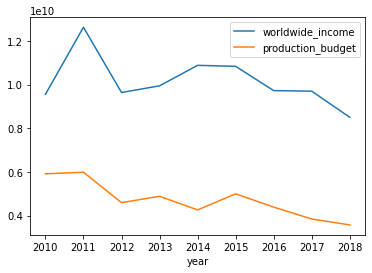

In [138]:
#plot worldwide_income and production_budget
year_worldwide_income.groupby(['year'])['worldwide_income','production_budget'].sum().plot()


There are large swings in average movie investment return. 

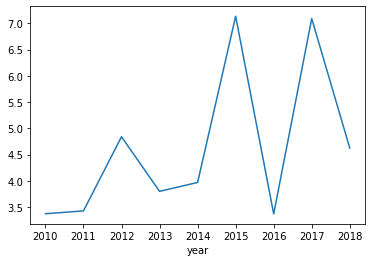

In [139]:
#get average gross return per dollar invested per year between years 2010 and 2018 for all genres.
year_worldwide_income.groupby(['year'])['gross_return'].mean().plot()

The large swings in average movie investment above compilment the year over year changes in averge production budjet below. 

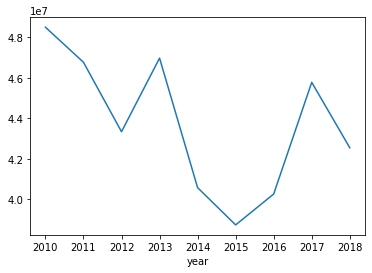

In [140]:
#get mean production budget per year
year_worldwide_income.groupby(['year'])['production_budget'].mean().plot()

# Question 2 What is the greatest income generating genre? 

In [141]:
#return the most lucrative genre/year sorted by cumulative worldwide_income 
Year_genre_worldwide_income = tn_movie_budgets__gz.groupby(['year','genres'])['gross_return','worldwide_income'].agg(['mean','count','sum']).sort_values(('worldwide_income', 'sum'), ascending=False)
Year_genre_worldwide_income.head(5)
#df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

<ipython-input-141-49b6b11b3c71>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Year_genre_worldwide_income = tn_movie_budgets__gz.groupby(['year','genres'])['gross_return','worldwide_income'].agg(['mean','count','sum']).sort_values(('worldwide_income', 'sum'), ascending=False)


gross_return                   \
                                        mean count        sum   
year genres                                                     
2011 Adventure,Animation,Comedy     2.013773     9  18.123957   
2013 Action,Adventure,Sci-Fi        1.636898     6   9.821391   
2016 Adventure,Animation,Comedy     2.764719     6  16.588312   
2011 Action,Adventure,Animation     2.859420     3   8.578261   
2017 Adventure,Animation,Comedy     2.012574     7  14.088021   

                                worldwide_income                    
                                            mean count         sum  
year genres                                                         
2011 Adventure,Animation,Comedy     2.027460e+08     9  1824714428  
2013 Action,Adventure,Sci-Fi        2.100437e+08     6  1260262438  
2016 Adventure,Animation,Comedy     2.086763e+08     6  1252057527  
2011 Action,Adventure,Animation     3.946063e+08     3  1183818975  
2017 Adventure,Animation,Comedy     1.625151e+08     7  1137605358

<ipython-input-143-75503c1bdf0f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genre_worldwide_income = tn_movie_budgets__gz.groupby(['genres'])['production_budget','worldwide_income'].agg(['sum']).sort_values(('worldwide_income', 'sum'), ascending=False)


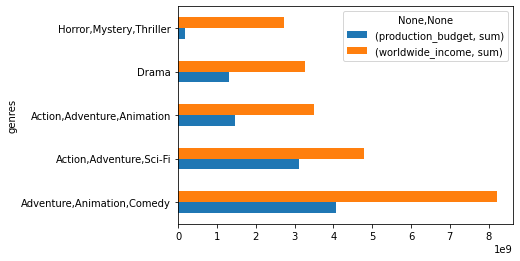

In [143]:
#Graph overall top 5 most lucrative genres sorted by worldwide_income
genre_worldwide_income = tn_movie_budgets__gz.groupby(['genres'])['production_budget','worldwide_income'].agg(['sum']).sort_values(('worldwide_income', 'sum'), ascending=False)
genre_worldwide_income.head(5).plot.barh()


In [144]:
Total_Rank_wordwide_income_genres = tn_movie_budgets__gz.groupby(['genres'])['Total_Rank','popularity','worldwide_income'].agg(['sum','mean']).sort_values(('worldwide_income','sum'),ascending = False)
Total_Rank_wordwide_income_genres.head(5)

<ipython-input-144-a6ef3b5476ea>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Total_Rank_wordwide_income_genres = tn_movie_budgets__gz.groupby(['genres'])['Total_Rank','popularity','worldwide_income'].agg(['sum','mean']).sort_values(('worldwide_income','sum'),ascending = False)


Total_Rank             popularity             \
                                  sum        mean        sum       mean   
genres                                                                    
Adventure,Animation,Comedy      10725  249.418605    636.254  14.796605   
Action,Adventure,Sci-Fi          5635  256.136364    470.416  21.382545   
Action,Adventure,Animation       1711  155.545455    203.255  18.477727   
Drama                           33850  593.859649    552.063   9.685316   
Horror,Mystery,Thriller          9238  369.520000    294.857  11.794280   

                           worldwide_income                
                                        sum          mean  
genres                                                     
Adventure,Animation,Comedy       8213014160  1.910003e+08  
Action,Adventure,Sci-Fi          4793262400  2.178756e+08  
Action,Adventure,Animation       3510237373  3.191125e+08  
Drama                            3272126713  5.740573e+07  
Horror,Mystery,Thriller          2715916651  1.086367e+08

Note that Total_Rank of 1 is the highest rank so a smaller sum of ranks equates to higher rank of that genre. The highest ranked genre Action,Adventure,Animation turns out to be the highest income generated genre.

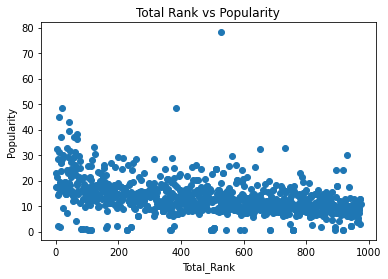

In [146]:
#Scatter plot of Total_Rank and popularity
plt.scatter(tn_movie_budgets__gz['Total_Rank'], tn_movie_budgets__gz['popularity'])
plt.xlabel("Total_Rank")
plt.ylabel("Popularity")
plt.title("Total Rank vs Popularity")
plt.show()


In [147]:
#return the most lucrative studio sorted by year
Year_studio = tn_movie_budgets__gz.groupby(['year','studio'])['worldwide_income'].agg(['mean','count','sum']).sort_values(('year'), ascending=False)
Year_studio

mean  count        sum
year studio                                   
2018 WB (NL)    4.797032e+07      8  383762561
     LG/S       2.852716e+07      1   28527161
     A24        6.013390e+07      1   60133905
     Affirm     2.052950e+07      1   20529498
     Annapurna  9.875170e+06      3   29625509
...                      ...    ...        ...
2010 Wein.      1.556624e+07      1   15566240
     3D         1.151520e+07      1   11515203
     BV         4.222012e+07      4  168880460
2005 Fox        2.456328e+08      1  245632750
1984 Sony       8.281556e+07      1   82815558

[228 rows x 3 columns]

# Investigate most lucrative genre : Adventure,Animation,Comedy  

In [148]:
#create a slice of the budget dataframe for Adventure,Animation,Comedy
Adventure_Animation_Comedy = tn_movie_budgets__gz.loc[(tn_movie_budgets__gz['genres'] == "Adventure,Animation,Comedy")]

#verify types
Adventure_Animation_Comedy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 222 to 3806
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   release_date_x          43 non-null     datetime64[ns]
 1   movie                   43 non-null     object        
 2   production_budget       43 non-null     int64         
 3   domestic_gross_x        43 non-null     int64         
 4   worldwide_gross         43 non-null     int64         
 5   studio                  43 non-null     object        
 6   tconst                  43 non-null     object        
 7   runtime_minutes         43 non-null     float64       
 8   genres                  43 non-null     object        
 9   directors               43 non-null     object        
 10  writers                 43 non-null     object        
 11  popularity              43 non-null     float64       
 12  vote_average            43 non-null     float64 

In [149]:
#Sort by Total_Rank
Adventure_Animation_Comedy = Adventure_Animation_Comedy.sort_values(['Total_Rank'],ascending=True)

#view df
Adventure_Animation_Comedy.head(10)

,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,studio,tconst,runtime_minutes,genres,directors,...,production_budget_Z,worldwide_income_Z,worldwide_gross_Z,gross_return,production_budget_norm,worldwide_income_norm,gross_return_norm,Total_Rank,release_month,week_number
222,2016-11-23,Moana,150000000,248757044,637517365,BV,tt3521164,107.0,"Adventure,Animation,Comedy","nm0166256,nm0930261,nm0615780,nm2320658",...,1.662216,1.954422,2.828797,3.250116,0.681746,0.871407,0.007820,14,11,47
1119,2018-07-13,Hotel Transylvania 3: Summer Vacation,65000000,167500092,527079962,Sony,tt5220122,97.0,"Adventure,Animation,Comedy",nm0850733,...,0.213054,1.816619,2.181713,7.108922,0.295294,0.825936,0.017106,18,07,28
520,2011-07-29,The Smurfs,110000000,142614158,563749323,Sony,tt0472181,103.0,"Adventure,Animation,Comedy",nm0331532,...,0.980257,1.771489,2.396570,4.124994,0.499886,0.811044,0.009926,19,07,30
692,2011-04-15,Rio,90000000,143619809,487519809,Fox,tt1436562,96.0,"Adventure,Animation,Comedy",nm0757858,...,0.639278,1.466875,1.949919,4.416887,0.408957,0.710531,0.010628,32,04,15
459,2017-03-31,The Boss Baby,125000000,175003033,510878762,Fox,tt3874544,97.0,"Adventure,Animation,Comedy",nm0569891,...,1.235992,1.403812,2.086786,3.087030,0.568084,0.689721,0.007428,37,03,13
96,2012-06-22,Brave,185000000,237282182,554606532,BV,tt1217209,93.0,"Adventure,Animation,Comedy","nm0152312,nm0700760,nm0028764",...,2.258930,1.315659,2.342999,1.997873,0.840873,0.660634,0.004807,41,06,25
424,2014-04-11,Rio 2,130000000,131538435,492846291,Fox,tt2357291,101.0,"Adventure,Animation,Comedy",nm0757858,...,1.321236,1.279037,1.981129,2.791125,0.590816,0.648549,0.006716,44,04,15
75,2011-06-24,Cars 2,200000000,191450875,560155383,BV,tt1216475,106.0,"Adventure,Animation,Comedy","nm0506977,nm0005124",...,2.514664,1.264459,2.375512,1.800777,0.909070,0.643739,0.004333,45,06,25
178,2012-11-02,Wreck-It Ralph,165000000,189412677,496511521,BV,tt1772341,101.0,"Adventure,Animation,Comedy",nm0601781,...,1.917950,1.109286,2.002604,2.009161,0.749943,0.592536,0.004834,53,11,44
557,2016-07-22,Ice Age: Collision Course,105000000,64063008,402156682,Fox,tt3416828,94.0,"Adventure,Animation,Comedy","nm0862211,nm1154886",...,0.895012,0.923174,1.449753,2.830064,0.477154,0.531125,0.006810,69,07,29


Note below that although fox makes the most money its average worldwide_income is driven down due to larger number of movies generated. BV's average worldwide income is driven by having highly Ranked movies. Mona, which BV made is the highest Ranking movie in the animation/animation/comedy genre.  

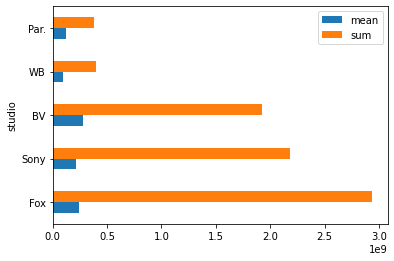

In [152]:
#find out which studio makes more money in this genre
Adventure_Animation_Comedy_studio = Adventure_Animation_Comedy.groupby(['studio'])['worldwide_income'].agg(['mean','sum']).sort_values(('sum'), ascending=False)
Adventure_Animation_Comedy_studio.head(5).plot.barh()

# Question 3 which director is part of the adventure/animation/comedy projects make the most income?

Looks like director id nm0757858 is the right choice since they made 3 movies. Though I did want to note that director codes nm0166256,nm0930261,nm0615780,nm2320658 were involved with directing Mona - the highest Ranked movie.

In [154]:
#find out which directors make the most money in this genre
#find out which director(s) makes more money in this genre
Adventure_Animation_Comedy_directors = Adventure_Animation_Comedy.groupby(['directors'])['worldwide_income'].agg(['mean','count','sum']).sort_values(('sum'), ascending=False)
Adventure_Animation_Comedy_directors.head(3)

,mean,count,sum
directors,,,
nm0757858,3.130713e+08,3,939214030
nm0331532,3.461484e+08,2,692296846
"nm0166256,nm0930261,nm0615780,nm2320658",4.875174e+08,1,487517365


# Question 4 which writer contributes to the projects which make the most money in the adventure/animation/comedy movie genre

Any of the top 3 below would be a good choice. 

In [156]:
#find out which writer makes most money in the adventure/animation/comedy movie genre
Adventure_Animation_Comedy_writers = Adventure_Animation_Comedy.groupby(['writers'])['worldwide_income'].agg(['mean','count','sum']).sort_values(('sum'), ascending=False)
Adventure_Animation_Comedy_writers.head(3)

,mean,count,sum
writers,,,
"nm1158544,nm0166256,nm0615780,nm0930261,nm2320658,nm0962596,nm3764118,nm3764493",487517365,1,487517365
"nm0850733,nm0567112",462079962,1,462079962
"nm0826425,nm0918955,nm0771065,nm0740115,nm0678963",453749323,1,453749323


# Recommendations

Question 1 what is the current state of the movie business? 
Due to the large yearly swings in investment and profit in the movie business its important to follow a data diven decision making approach. 

Question 2 what is the best movie genre by worldwide profit? 
The Adventure/animation/comedy genre is the most lucrative. 

Question 3 what is the most successful studio for making Adventure/animation/comedy films. 
Fox makes the most money in the Adventure/animation/comedy genre. 

Question 4 which writer director combination will yeild the greatest return? 
Director id nm0757858 is the top director in the Adventure/animation/comedy genre. There is no clear writer which have an advantage. 



# Future work

What is the relationship between popularity and worldwide income? According to corrolation analysis there is a mediumn positive corrolation between this and worldwide_income.

In [157]:
#which studio has the highest total worldwide_income, same as above except ommiting year 
Total_Rank_Popularity_and_worldwide_income = tn_movie_budgets__gz.groupby(['studio'])['popularity','worldwide_income'].agg(['sum']).sort_values(('worldwide_income','sum'),ascending=False)

Total_Rank_Popularity_and_worldwide_income.head(5)

<ipython-input-157-dfe49b11857e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Total_Rank_Popularity_and_worldwide_income = tn_movie_budgets__gz.groupby(['studio'])['popularity','worldwide_income'].agg(['sum']).sort_values(('worldwide_income','sum'),ascending=False)


,popularity,worldwide_income
,sum,sum
studio,,
Uni.,1677.069,16749458042
Fox,1589.961,16383582822
WB,1210.061,8808759717
Par.,931.910,8713097481
Sony,895.178,8081378850


# Sub analysis Corrolation of variables 

Looks like nothing is closely corrolated with gross return. 
Popularity and vote count have a medium positive corrolation with worldwide income.

In [158]:
#create a corrolaition matrix for the numerical columns.
corrMatrix = tn_movie_budgets__gz.corr()
corrMatrix.style.background_gradient(cmap='coolwarm').set_precision(1).set_properties(**{'font-size': '10pt'})

,production_budget,domestic_gross_x,worldwide_gross,runtime_minutes,popularity,vote_average,vote_count,year,worldwide_income,production_budget_Z,worldwide_income_Z,worldwide_gross_Z,gross_return,production_budget_norm,worldwide_income_norm,gross_return_norm,Total_Rank,week_number
production_budget,1.0,0.6,0.8,0.2,0.4,-0.0,0.5,-0.0,0.5,0.6,0.2,0.4,-0.2,1.0,0.5,-0.2,-0.5,0.0
domestic_gross_x,0.6,1.0,0.9,0.2,0.4,0.1,0.6,-0.0,0.9,0.2,0.3,0.5,0.1,0.6,0.9,0.1,-0.8,0.0
worldwide_gross,0.8,0.9,1.0,0.2,0.5,0.1,0.7,0.0,1.0,0.4,0.5,0.6,0.0,0.8,1.0,0.0,-0.8,0.0
runtime_minutes,0.2,0.2,0.2,1.0,0.3,0.3,0.3,0.0,0.2,0.1,0.1,0.1,-0.1,0.2,0.2,-0.1,-0.2,0.1
popularity,0.4,0.4,0.5,0.3,1.0,0.3,0.6,0.2,0.4,0.2,0.2,0.3,-0.1,0.4,0.4,-0.1,-0.4,0.1
vote_average,-0.0,0.1,0.1,0.3,0.3,1.0,0.4,0.0,0.2,0.1,0.1,0.1,-0.1,-0.0,0.2,-0.1,-0.2,0.2
vote_count,0.5,0.6,0.7,0.3,0.6,0.4,1.0,-0.0,0.6,0.2,0.3,0.4,-0.0,0.5,0.6,-0.0,-0.6,0.1
year,-0.0,-0.0,0.0,0.0,0.2,0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0
worldwide_income,0.5,0.9,1.0,0.2,0.4,0.2,0.6,0.0,1.0,0.3,0.5,0.6,0.1,0.5,1.0,0.1,-0.8,0.0
production_budget_Z,0.6,0.2,0.4,0.1,0.2,0.1,0.2,-0.0,0.3,1.0,0.3,0.5,0.0,0.6,0.3,0.0,-0.1,-0.0


In [159]:
#sort the corrolation matrix by which feature is most corrolated to fross return 
corrMatrix.sort_values(by=['gross_return'],ascending=False)

,production_budget,domestic_gross_x,worldwide_gross,runtime_minutes,popularity,vote_average,vote_count,year,worldwide_income,production_budget_Z,worldwide_income_Z,worldwide_gross_Z,gross_return,production_budget_norm,worldwide_income_norm,gross_return_norm,Total_Rank,week_number
gross_return_norm,-0.150993,0.051832,0.021431,-0.086129,-0.053317,-0.069778,-0.008713,0.039809,0.090598,0.047943,-0.019275,-0.016265,1.000000,-0.150993,0.090598,1.000000,-0.124008,-0.051441
gross_return,-0.150993,0.051832,0.021431,-0.086129,-0.053317,-0.069778,-0.008713,0.039809,0.090598,0.047943,-0.019275,-0.016265,1.000000,-0.150993,0.090598,1.000000,-0.124008,-0.051441
worldwide_income_norm,0.539795,0.873339,0.961040,0.161787,0.436063,0.175566,0.645100,0.037719,1.000000,0.255856,0.501361,0.636172,0.090598,0.539795,1.000000,0.090598,-0.847958,0.015083
worldwide_income,0.539795,0.873339,0.961040,0.161787,0.436063,0.175566,0.645100,0.037719,1.000000,0.255856,0.501361,0.636172,0.090598,0.539795,1.000000,0.090598,-0.847958,0.015083
domestic_gross_x,0.603553,1.000000,0.882699,0.171017,0.397882,0.142719,0.595236,-0.015982,0.873339,0.230060,0.333499,0.452846,0.051832,0.603553,0.873339,0.051832,-0.807747,0.016578
production_budget_Z,0.573858,0.230060,0.388969,0.059196,0.209938,0.059316,0.241026,-0.019410,0.255856,1.000000,0.268764,0.508739,0.047943,0.573858,0.255856,0.047943,-0.111090,-0.021324
year,-0.035867,-0.015982,0.017787,0.023797,0.200846,0.020744,-0.021757,1.000000,0.037719,-0.019410,0.031129,0.026647,0.039809,-0.035867,0.037719,0.039809,-0.035452,-0.006431
worldwide_gross,0.751445,0.882699,1.000000,0.194727,0.482065,0.137334,0.658505,0.017787,0.961040,0.388969,0.462566,0.628088,0.021431,0.751445,0.961040,0.021431,-0.825185,0.018031
vote_count,0.465589,0.595236,0.658505,0.295268,0.618886,0.378744,1.000000,-0.021757,0.645100,0.241026,0.296041,0.392697,-0.008713,0.465589,0.645100,-0.008713,-0.570441,0.082342
worldwide_gross_Z,0.394267,0.452846,0.628088,0.089119,0.258924,0.121882,0.392697,0.026647,0.636172,0.508739,0.891353,1.000000,-0.016265,0.394267,0.636172,-0.016265,-0.198273,0.010572
